In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100, embedding_dim=2)

05/12/2020 15:35:37 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/12/2020 15:35:39 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/12/2020 15:35:41 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/12/2020 15:35:42 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run5_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sou

In [7]:
dtfa.num_blocks

618

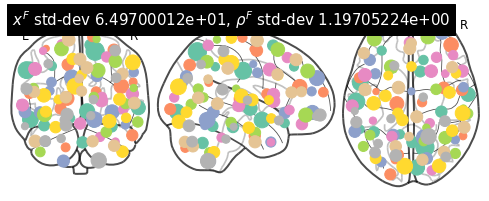

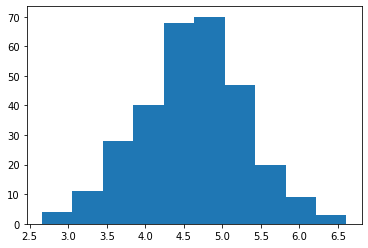

(<nilearn.plotting.displays.OrthoProjector at 0x7f81867f0350>,
 tensor([[ 1.5720e+01, -6.5885e+01,  5.7195e+01],
         [ 1.4156e+01,  2.5888e+01, -1.7754e+01],
         [-1.0488e+01, -5.2195e+01, -1.3419e+01],
         [ 1.0750e+01,  1.3811e+01,  6.3756e+01],
         [-5.6429e+01, -1.7728e+01,  3.7274e+01],
         [ 6.1191e+01, -1.0297e+01, -2.2985e+00],
         [-5.2371e+01,  2.0915e+00, -1.4572e+01],
         [ 7.3188e+00, -8.7152e+01, -6.0961e+00],
         [-5.2611e+01, -4.7018e+01,  4.1436e+01],
         [-3.7924e+01, -4.9911e+01, -2.0985e+01],
         [-2.9728e+01,  3.5780e+01,  4.1605e+01],
         [ 3.2984e+01, -2.8460e+01, -2.1964e+01],
         [ 2.5469e+00, -6.0432e+01, -3.8768e+01],
         [ 4.3211e+01,  4.1735e+01,  2.0461e+01],
         [-1.2960e+01, -7.3981e+01,  4.3160e+01],
         [ 5.5710e+01, -5.3915e+01,  2.4908e+01],
         [ 5.4804e+01, -5.5688e+00, -3.1244e+01],
         [-1.3812e+01, -1.9922e+01,  7.5038e+00],
         [-3.5746e+01, -7.3031e+00,  

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=True, blocks_filter=lepping_db.inference_filter(training=True, held_out_tasks=set(['tones', 'response'])))

05/12/2020 15:40:30 [Epoch 1] (12643ms) Posterior free-energy 5.29975168e+08 = KL from prior 6.88922938e+05 - log-likelihood -5.29286240e+08
05/12/2020 15:40:30 Saving checkpoint...
05/12/2020 15:40:41 [Epoch 2] (11017ms) Posterior free-energy 5.21988448e+08 = KL from prior 6.61391625e+05 - log-likelihood -5.21327072e+08
05/12/2020 15:40:52 [Epoch 3] (10857ms) Posterior free-energy 5.15232640e+08 = KL from prior 6.40741312e+05 - log-likelihood -5.14591936e+08
05/12/2020 15:41:03 [Epoch 4] (10800ms) Posterior free-energy 5.09189312e+08 = KL from prior 6.19107562e+05 - log-likelihood -5.08570208e+08
05/12/2020 15:41:14 [Epoch 5] (10778ms) Posterior free-energy 5.04694080e+08 = KL from prior 6.01744250e+05 - log-likelihood -5.04092256e+08
05/12/2020 15:41:25 [Epoch 6] (10788ms) Posterior free-energy 4.99867008e+08 = KL from prior 5.82179250e+05 - log-likelihood -4.99284896e+08
05/12/2020 15:41:35 [Epoch 7] (10800ms) Posterior free-energy 4.96495968e+08 = KL from prior 5.69130500e+05 - log

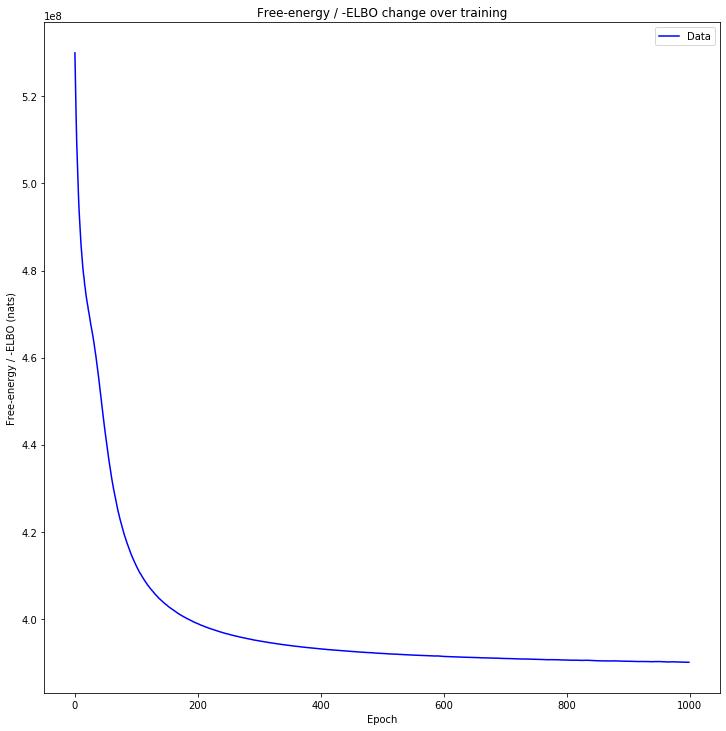

In [10]:
utils.plot_losses(losses)

In [11]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [12]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    elif task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = task.capitalize()
    return task

In [13]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.subject)
    return subject + ', ' + task + ' stimulus'

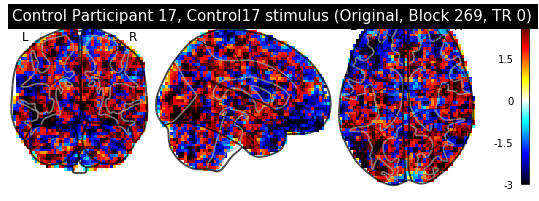

05/12/2020 18:40:57 Reconstruction Error (Frobenius Norm): 1.37941345e+02 out of 8.27515869e+02


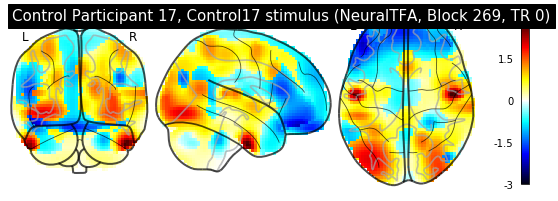

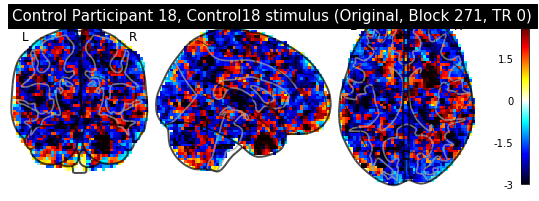

05/12/2020 18:40:59 Reconstruction Error (Frobenius Norm): 1.31571503e+02 out of 8.18140686e+02


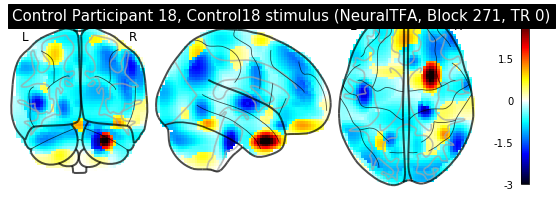

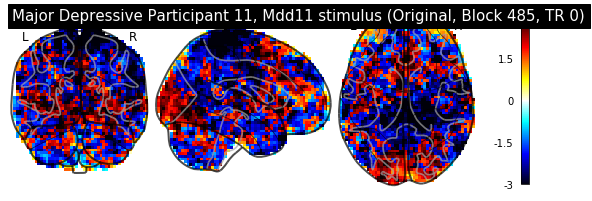

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
05/12/2020 18:41:02 Reconstruction Error (Frobenius Norm): 1.45428574e+02 out of 8.46063354e+02


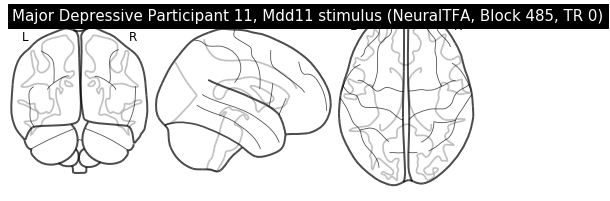

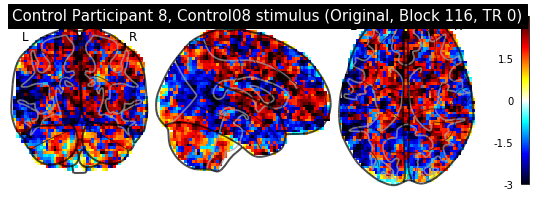

05/12/2020 18:41:04 Reconstruction Error (Frobenius Norm): 1.69257462e+02 out of 8.25442139e+02


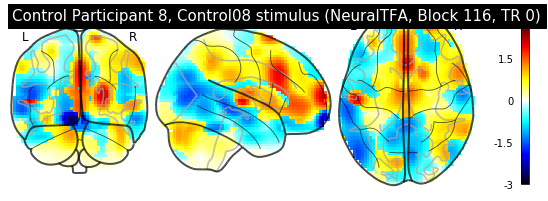

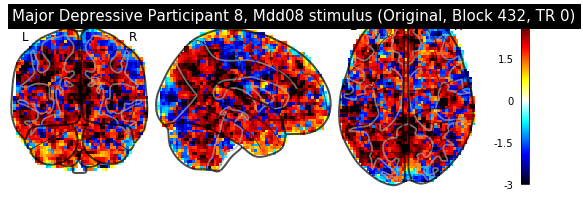

05/12/2020 18:41:07 Reconstruction Error (Frobenius Norm): 1.56457901e+02 out of 8.45601013e+02


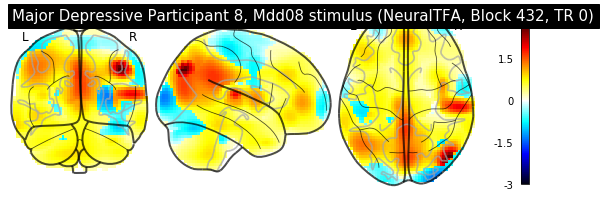

In [14]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


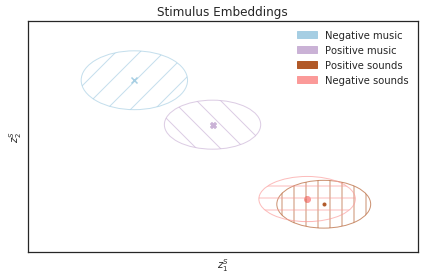

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Paired', legend_ordering=[0, 2, 3, 1])

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:145: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


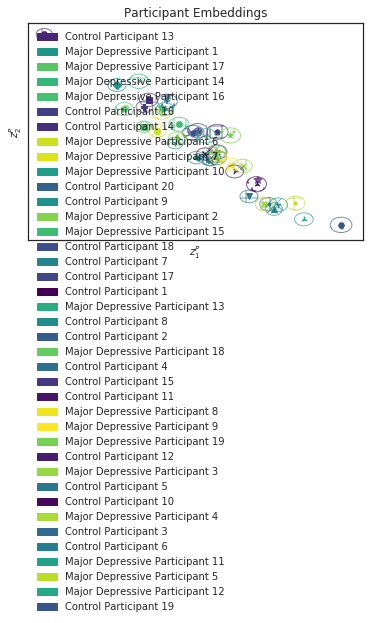

In [16]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

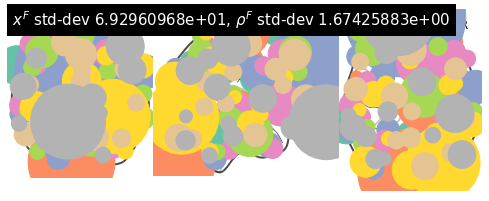

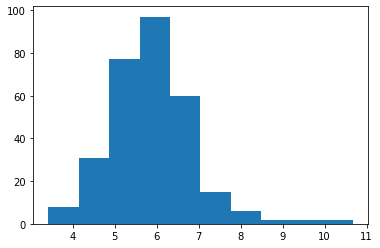

(<nilearn.plotting.displays.OrthoProjector at 0x7f815c187750>,
 tensor([[ 1.2456e+01, -7.3020e+01,  4.7388e+01],
         [ 2.7384e+01,  4.0948e+01, -2.3373e+01],
         [-2.8305e+00, -5.5644e+01, -1.4500e+01],
         [ 1.4030e+01,  1.3057e+01,  7.3984e+01],
         [-5.0593e+01, -6.7085e+00,  2.8612e+01],
         [ 6.2543e+01, -1.3266e+01,  7.6024e+00],
         [-4.2968e+01, -8.0449e+00, -9.3919e+00],
         [ 1.2125e+00, -9.2472e+01,  4.2921e-01],
         [-6.6593e+01, -4.1872e+01,  4.2397e+01],
         [-3.8110e+01, -7.0037e+01, -1.9620e+01],
         [-3.4611e+01,  4.2265e+01,  3.0284e+01],
         [ 2.9825e+01, -3.3713e+01, -1.7034e+01],
         [ 4.3173e+00, -5.7682e+01, -3.2477e+01],
         [ 4.6114e+01,  4.5062e+01,  2.0686e+01],
         [-1.4104e+01, -7.4792e+01,  4.1214e+01],
         [ 5.9536e+01, -4.6335e+01,  2.2194e+01],
         [ 5.3916e+01, -7.2843e+00, -1.1621e+01],
         [-3.7144e+00, -1.9732e+01,  8.3165e+00],
         [-4.1977e+01, -5.8452e+00,  

In [17]:
dtfa.visualize_factor_embedding()

In [18]:
dtfa.average_reconstruction_error()

05/12/2020 18:41:43 Average reconstruction error (MSE): 9.28158429e-01
05/12/2020 18:41:43 Average data norm (Euclidean): 1.05002988e+00
05/12/2020 18:41:43 Percent average reconstruction error: 0.355799


(0.9281584286222939, 1.0500298773474526, 0.003557989442734486)

In [19]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


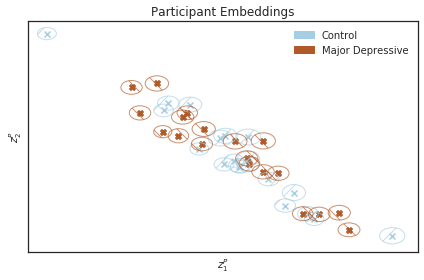

In [20]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None, colormap='Paired')

In [21]:
dtfa.average_reconstruction_error(weighted=False)

05/12/2020 18:42:16 Average reconstruction error (MSE): 7.31295656e+02 +/- 7.50846008e+01
05/12/2020 18:42:16 Average data norm (Euclidean): 8.29830948e+02 +/- 5.52383552e+01
05/12/2020 18:42:16 Percent average reconstruction error: 88.226511 +/- 7.98155824e+00


(array([ 866.74328613,  712.08374023,  741.68145752,  728.15924072,
         678.27923584,  796.51477051,  722.5536499 ,  817.7019043 ,
         626.36193848,  622.76202393,  638.29516602,  628.38287354,
         667.29638672,  717.26898193,  687.5390625 ,  677.24743652,
         836.38604736,  679.71679688,  767.07232666,  681.59106445,
         727.01953125,  863.61248779,  744.63897705,  856.12237549,
         696.9508667 ,  711.53155518,  705.8170166 ,  689.46972656,
         677.63317871,  751.1048584 ,  703.16998291,  727.83654785,
         771.48608398,  685.61291504,  802.23388672,  674.77770996,
         632.05627441,  818.30853271,  640.52380371,  748.11407471,
         712.9755249 ,  653.66741943,  699.58441162,  712.71063232,
         697.97961426,  714.04724121,  705.65270996,  733.8706665 ,
         835.9989624 ,  723.28405762,  819.20037842,  703.07769775,
         741.2255249 ,  884.72198486,  758.37957764,  906.78930664,
         742.85162354,  749.57794189,  751.57476